<a href="https://colab.research.google.com/github/marinavillaschi/portfolio_datascience_mpv/blob/main/An%C3%A1lise_de_Novos_F%C3%A1rmacos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise de Novos Fármacos

*by [Marina Villaschi](https://www.linkedin.com/in/marinavillaschi)*


<center><img width="90%" src="http://images.unsplash.com/photo-1587854692152-cbe660dbde88?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max"></center>

<center>Photo by <a href="https://unsplash.com/@victoriabcphotographer?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Christina Victoria Craft</a> on <a href="https://unsplash.com/s/photos/pharmacy?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></center>
  
Esse projeto foi desenvolvido durante a 3ª edição da Imersão Dados da Alura.

Nessa imersão nós mergulhamos no universo da biologia e da biotecnologia e exploramos uma base de dados da área.

Sabemos que esse banco de dados se refere a drogas administradas à culturas de células.

# Importando os dados

Os dados utilizados para esse projeto estão disponíveis neste [repositório do Github](https://github.com/alura-cursos/imersaodados3/tree/main/dados) da Alura.

Esse projeto foi inspirado em um desafio do [Laboratory for Innovation Science at Harvard](https://lish.harvard.edu/) disponibilizando os dados em uma competição no [kaggle](https://www.kaggle.com/c/lish-moa).





In [18]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# criando uma variável com arquivo
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

# importando o arquivo para um DataFrame
df = pd.read_csv(url_dados, compression = 'zip')

# Análise Exploratória dos Dados

Vamos começar a conhecer nossos dados através da Análise Exploratória, passo extremamente importante de qualquer projeto de Ciência de Dados.

### Variáveis e entradas

In [5]:
# verificando o tamanho do dataframe
print("Entradas:  ", df.shape[0], "\nVariáveis: ", df.shape[1])

Entradas:   23814 
Variáveis:  877


In [2]:
# imprimindo as 5 primeiras entradas do dataframe
df.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [33]:
# imprimindo as 5 últimas entradas do dataframe
df.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


Podemos perceber que temos colunas de fácil interpretabilidade como `id`, `tratamento`, `tempo`, `dose` e `droga`. Outras colunas como `g-0` até `c-99`, inicialmente não nos trazem muita informação.

Vamos começar investigando quais os valores de entradas da coluna `tratamento`.

In [8]:
# verificando valores unicos para tratamento
df.tratamento.unique()

array(['com_droga', 'com_controle'], dtype=object)

Encontramos dois valores de entradas para `tratamento`: `com_droga` e `com_controle`.

Com droga, como o próprio nome nos diz, é quando estamos aplicando algum tipo de droga para a amostra. Já com o controle é uma técnica estatística em que isolamos as outras varíaveis e observamos apenas a variável de interesse.

Vamos investigar agora a variável `tempo`.


In [13]:
# verificando valores unicos para tempo
df.tempo.unique()

array([24, 72, 48])

Encontramos três valores de entradas para `tempo`: 24, 72 e 48. Podemos deduzir que essa variável se refere ao tempo em horas de exposição à droga.

Vamos investigar agora a variável `dose`.


In [12]:
# verificando valores unicos para dose
df.dose.unique()

array(['D1', 'D2'], dtype=object)

Encontramos dois valores de entradas para `dose`: `D1` e `D2`.
Podemos entender que se tratam de duas doses distintas porém não conseguimos afirmar nada categoricamente de antemão.

Vamos investigar agora a variável `droga`.

In [11]:
# verificando valores unicos para droga
df.droga.unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

Encontramos muitos valores para `droga`, e estão codificadas. É possível que tenham sido codificados com o intuito de anonimizar os tipos de drogas usadas, para evitar qualquer tipo de olhar tendencioso que gere um viés na análise dos resultados.

Vamos verificar quantos tipos de drogas foram utilizados nesse estudo.

In [70]:
# verificando quantos entradas distintas temos para drogas
print('Foram utilizados {} tipos de drogas.'.format(df.droga.nunique()))
print('\n')

# verificando as 5 drogas mais utilizadas
print('5 Drogas mais utilizadas:')
print(df.droga.value_counts().head())

Foram utilizados 3289 tipos de drogas.


5 Drogas mais utilizadas:
cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
Name: droga, dtype: int64


Vamos investigar agora a variável `g-0`.

In [14]:
# verificando valores unicos para g-0
df['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

Encontramos novamente muitos valores para `g-0` que não nos trazem muita informação sobre o que representam.

Com o auxílio da Vanessa, especialista que acompanhou a imersão, sabemos que essa letra 'g' da coluna remete à palavra gene. Ou seja, esses números nos dizem a expressão de cada gene frente as drogas ou a exposição.

Aparentemente esses números foram padronizados, o que é bastante comum no meio científico para criarmos um intervalo não muito grande, em que a média seja 0 e dessa forma possamos compará-los de alguma forma.

Vamos filtrar os dados dessa coluna `g-0` somente com as entradas que tenham valores positivos, ou seja, acima da mediana que é 0.

Antes disso, vamos eliminar o hífen para que a biblioteca `pandas` não dê erro.


In [51]:
# criando uma cópia do dataframe para realizar as alterações
df2 = df.copy()

# eliminando o hífen do nome das variáveis
df2.columns = df2.columns.str.replace('-', '')
df2.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [53]:
# filtrando as entradas positivas de g-0
df2_filtrados = df2.query('g0 > 0')
df2_filtrados.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


### Distribuição do dataset

Vamos analisar agora a distribuição das variáveis, começando por `tratamento`.


com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64




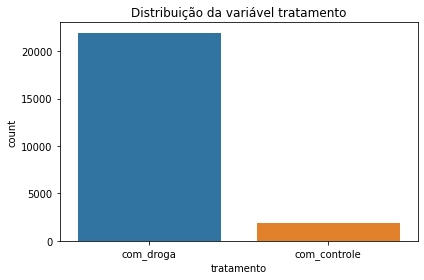

In [27]:
# ver distribuição variável tratamento
print(df.tratamento.value_counts(normalize=True))
print('\n')

# imprimir countplot para visualição
fig, ax = plt.subplots()
sns.countplot(x=df.tratamento, ax=ax)
ax.set_title('Distribuição da variável tratamento')
plt.tight_layout()

É possível perceber um desbalanceamento da variável `tratamento`, onde 92% das colonias de células foram tratadas com drogas e apenas 8% com controle.

Esse desbalanceamento faz sentido uma vez que várias drogas foram testadas ao mesmo tempo que independente do número de drogas, só é necessário um grupo de controle.

Vamos investigar a variável `tempo`.



48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64




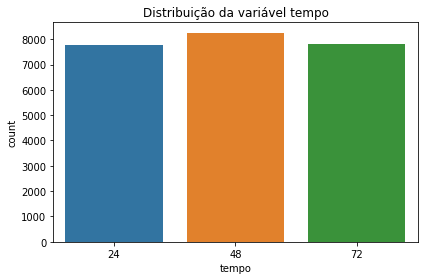

In [31]:
# ver distribuição variável tempo
print(df.tempo.value_counts(normalize=True))
print('\n')

# imprimir countplot para visualição
fig, ax = plt.subplots()
sns.countplot(x=df.tempo, ax=ax)
ax.set_title('Distribuição da variável tempo')
plt.tight_layout()

A variável `tempo` diferentemente da anterior se apresenta bem balanceada entre os três valores de entradas (24, 48 e 72)

Vamos continuar nossa investigação, agora com a variável `dose`.

D1    0.510078
D2    0.489922
Name: dose, dtype: float64




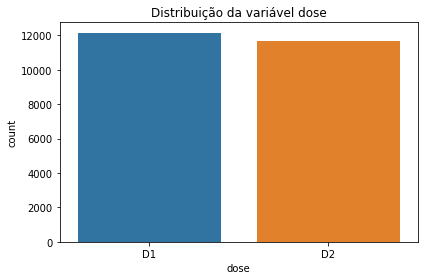

In [29]:
# ver distribuição variável dose
print(df.dose.value_counts(normalize=True))
print('\n')

# imprimir countplot para visualição
fig, ax = plt.subplots()
sns.countplot(x=df.dose, ax=ax)
ax.set_title('Distribuição da variável dose')
plt.tight_layout()

A variável `dose` também se apresenta balanceada entre os dois valores de entradas (D1 e D2).

### Resumo

Com essa primeira análise, já foi possível identificar:

* O dataset possui 23814 entradas e 877 variáveis;

* A variável `droga` foi codificada afim de evitar viés na análise do resultado;

* Foram utilizados 3289 tipos de drogas;

* As variáveis `g-0` até `c-99` foram padronizadas de forma que tem média=0 e desvio padrão=1;

* A variável `tratamento` apresenta desbalanceamento já que muitas drogas foram testadas e é necessário apenas um grupo de controle.